In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('titanic.csv')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Probability Density Graphs

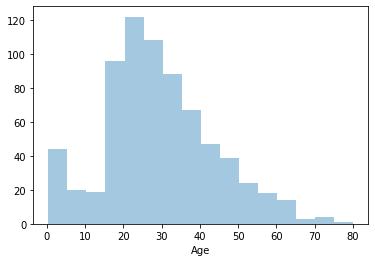

In [10]:
sns.distplot(df['Age'].dropna(), hist=True, kde=False, bins=16)

In [12]:
# show that 122 passengers are between 20-25

In [14]:
df[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [29]:
ages = df[['Age', 'PassengerId']].dropna()

In [30]:
len(ages)

714

In [34]:
between_20_to_25 = ages[(ages['Age'] >= 20.315) & (ages['Age'] <= 25.28)]

In [36]:
len(between_20_to_25)/len(ages)

0.17086834733893558

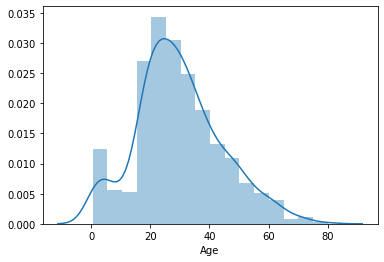

In [13]:
sns.distplot(df['Age'].dropna(), hist=True, bins=16)

The graph above is called the Probability Density Graph. The number on the y-axis is the following

(range*height)=f(x)/len(df)

In [37]:
less_than_40 = ages[ages['Age'] < 40]

In [40]:
len(less_than_40)/714

0.7717086834733894

# Cumulative Density Function

In [42]:
def count_lower(ls, threshold):
    out = 0
    for i in ls:
        if i <= threshold:
            out += 1
    return out

In [73]:
def cdf_list(ls, step_size):
    out = []
    
    threshold_range = range(int(min(ls)), int(max(ls)), step_size)
    for i in threshold_range:
        out.append(count_lower(ls, i)/len(ls))
    
    return out

In [74]:
ls = np.array([1,3,2,3,4,5,6,3,4,2,5,6,10,2])

In [75]:
ls.sort()

In [76]:
ls

array([ 1,  2,  2,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6, 10])

In [77]:
cdf_list(ls, 3)

[0.07142857142857142, 0.6428571428571429, 0.9285714285714286]

In [80]:
cdf_range = cdf_list(ages['Age'], 1)

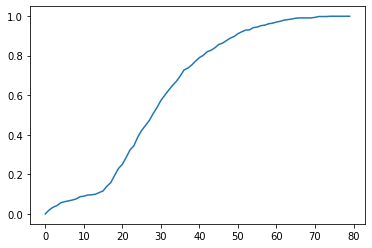

In [82]:
plt.plot((range(int(min(ages['Age'])), int(max(ages['Age'])))), cdf_range)

The Violin plot is also a way to see the Probability Density

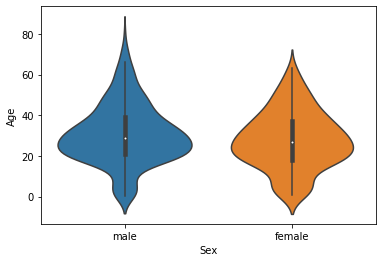

In [86]:
sns.violinplot(x="Sex", y="Age", data=df)

# Normal Distribution

If we plot a PDF (probability density function) and the data looks like a bell shape, then we say that the input list has normal distribution

In [145]:
# Here, 60 is the mean value of a, and 10 is the Standard Deviation
a = np.random.normal(60, 10, 1000000)

In [146]:
mean = a.mean()

In [147]:
std = np.std(a)

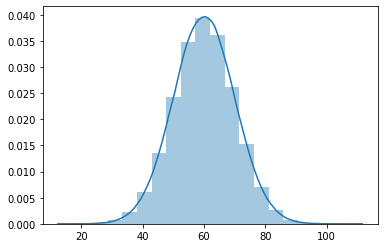

In [148]:
sns.distplot(a, hist=True, kde=True, bins=20)

In [149]:
s = 0
for i in a:
    if i < (mean+std) and i > (mean-std):
        s += 1
s/len(a)

0.683068

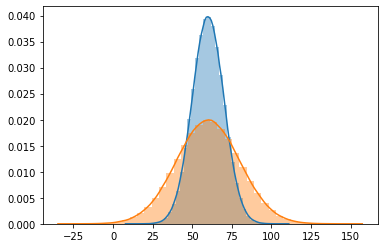

In [165]:
a = np.random.normal(60, 10, 1000000)
b = np.random.normal(60, 20, 1000000)

sns.distplot(a, hist=True, kde=True, bins=40)
sns.distplot(b, hist=True, kde=True, bins=40)

In [166]:
num = 0
for i in a:
    if i >= 50 and i <= 70:
        num += 1
num/len(a)

0.683231

In [167]:
num = 0
for i in b:
    if i >= 40 and i <= 80:
        num += 1
num/len(b)

0.682805

In [172]:
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

0.6826894921370859

Formula for figuring out probability from CDF: #sample_size * f(x) * step_size

In [154]:
from scipy.stats import norm

c = norm.sf(70, loc=60, scale=10)

In [155]:
c

0.15865525393145707

In [158]:
d = np.random.normal(60, 10, 10000)

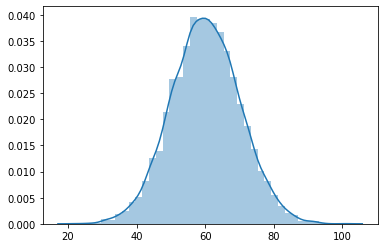

In [159]:
sns.distplot(d, hist=True, kde=True, bins=40)

In [161]:
.022 * 10000*30/10000

0.66

In [173]:
e = (d-60)/10

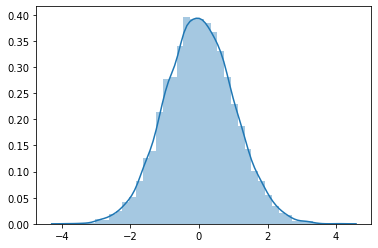

In [176]:
sns.distplot(e, hist=True, kde=True, bins=40)